<a href="https://colab.research.google.com/github/SepideHematian/my_course_projects/blob/main/602/Project1/Final_version_project1_group1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data602 - Project 1

**Group A/1** This project has been done by the folllowing people:

* Tahereh	Hematian Pour Fard 
* Kent	Butler
* Leslie	Li
* Colleen	Boarman


# Import modules

In [46]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

# Load Data
---

In [47]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [48]:
# Load all data
df_a = pd.read_csv('AAPL.csv')
df_bc = pd.read_csv('BTC-USD.csv')
df_s = pd.read_csv('SPY.csv')

In [49]:
# Map data in tuples for convenience
#   AAPL => df_a
#   BTC => df_bc
#   SPY => df_s
DATA_MAP = [('AAPL', df_a), ('BTC', df_bc), ('SPY', df_s)]
TICKER = 0
DF = 1

In [50]:
df_a.shape, df_bc.shape, df_s.shape

((252, 7), (365, 7), (252, 7))

In [51]:
df_a.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/2021,133.520004,133.610001,126.760002,129.410004,128.453445,143301900
1,1/5/2021,128.889999,131.740005,128.429993,131.009995,130.041611,97664900
2,1/6/2021,127.720001,131.050003,126.379997,126.599998,125.664207,155088000
3,1/7/2021,128.360001,131.630005,127.860001,130.919998,129.952271,109578200
4,1/8/2021,132.429993,132.630005,130.229996,132.050003,131.073929,105158200


In [52]:
for data in DATA_MAP:
  data[DF].rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

## Problem 1
---
a. Change the ‘Date’ column to pd.timestamp format.  (10pt)

b. Output the median timestamp for each df.


**a. Re-type Date as a timestamp**

In [53]:
# Re-type the Date column
for data in DATA_MAP:
  data[DF]['Date'] = pd.to_datetime(data[DF]['Date'])


**b. Output median dates per ticker**

In [54]:
# Output median timestamps
for data in DATA_MAP:
  print (data[DF]['Date'].median())

2021-07-04 00:00:00
2021-07-02 00:00:00
2021-07-04 00:00:00


**Observation**

The trading calendar for `BTC` is different than that of `AAPL` and `SPY`, which will result in slightly different time series data.

## Problem 2
----

**a.** Define a udf, called `daily_return`, as  $\frac{x_t - x_{(t-1)}}{x_{(t-1)}}$

**b.** Apply this function to both “Open” and “Adj Close” for each df; name the new columns properly.

For each df:
*   **c.** Output the average Open_daily_return 
*   **d.**  Output the average Adj_Close_daily_return, weighted by `volume`





In [55]:
# Aggregate previous Open and Adj_Close columns for convenience
for data in DATA_MAP:
  data[DF]['Prev_Open'] = data[DF]['Open'].shift(1)
  data[DF]['Prev_Adj_Close'] = data[DF]['Adj_Close'].shift(1)


In [56]:
# Fill in missing values
for data in DATA_MAP:
   data[DF].backfill(inplace=True)

**a. Define a udf to calculate daily return**

In [57]:
# Calculate percent change between the given fields
def daily_return (x, field, prevField): 
  prevVal = x[prevField]
  return (x[field] - prevVal)/prevVal

**b. Apply to “Open” and “Adj Close”**

In [58]:
# Calculate daily returns
for data in DATA_MAP:
   data[DF]['Open_daily_return'] = data[DF].apply(daily_return, axis=1, args=('Open','Prev_Open'))
   data[DF]['Adj_Close_daily_return'] = data[DF].apply(daily_return, axis=1, args=('Adj_Close','Prev_Adj_Close'))


In [59]:
# We expect 0 returns in the first row, since current Open/Close == Prev Open/Close due to backfill
df_s

,Date,Open,High,Low,Close,Adj_Close,Volume,Prev_Open,Prev_Adj_Close,Open_daily_return,Adj_Close_daily_return
0,2021-01-04,375.309998,375.450012,364.820007,368.790009,363.938812,110210800,375.309998,363.938812,0.000000,0.000000
1,2021-01-05,368.100006,372.500000,368.049988,371.329987,366.445343,66426200,375.309998,363.938812,-0.019211,0.006887
2,2021-01-06,369.709991,376.980011,369.119995,373.549988,368.636108,107997700,368.100006,366.445343,0.004374,0.005978
3,2021-01-07,376.100006,379.899994,375.910004,379.100006,374.113159,68766800,369.709991,368.636108,0.017284,0.014858
4,2021-01-08,380.589996,381.489990,377.100006,381.260010,376.244751,71677200,376.100006,374.113159,0.011938,0.005698
...,...,...,...,...,...,...,...,...,...,...,...
247,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,468.750000,470.600006,0.007061,0.014152
248,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,472.059998,477.260010,0.011990,-0.000817
249,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000,477.720001,476.869995,-0.001549,0.001279
250,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000,476.980011,477.480011,0.001992,-0.002765


**c. Average open Daily Return**

In [60]:
# Average over the given feature
def feature_average (df, avgField): 
   return df[avgField].mean()

In [61]:
# Print results
for data in DATA_MAP:
  print (data[TICKER], ' avg Open return: ',  feature_average(data[DF], 'Open_daily_return'))

AAPL  avg Open return:  0.0012698635794807704
BTC  avg Open return:  0.002228969514127038
SPY  avg Open return:  0.0009710080562317402


**d. Average Daily Return weighted by Volume**

In [62]:
# Define a weighted average return 
def weighted_average_return (df, returnField, weightField): 
  return (df[returnField] * df[weightField]).sum() / df[weightField].sum()


In [63]:
# Print results
for data in DATA_MAP:
  print (data[TICKER], ' weighted avg return: ',  weighted_average_return(data[DF], 'Adj_Close_daily_return', 'Volume'))

AAPL  weighted avg return:  0.0007133332514758545
BTC  weighted avg return:  0.0008862472377516518
SPY  weighted avg return:  0.00012657231559145903


**Observation**

It appears that the volume of trade on the `AAPL` ticker makes up for a lower average daily return than `BTC`;  and `SPY` appears to have the opposite situation - volume is low enough to bring down the weighted average.

## Problem 3
---
**a.** Concatenate the 3 df into a single df, vertically. Make sure you have a column `ticker` that tells you which ticker the observation is. (10pt)

### Output: 

* **b.** By ticker, output the Min, Max, Mean of `Open_daily_return`
* **c.** Percentile rank `Open_daily_return` across the df; name this column properly. 
* **d.** Within each quartile bucket of `Open_daily_return` (0 - 25%, 25% - 50%, 50% ~ 75%, and > 75%), count the number of observations of each ticker


**a. Concatente into a single df**

In [64]:
# Mark each df with its ticker of origin before merging
for data in DATA_MAP:
  data[DF]['ticker'] = [data[TICKER]] * len(data[DF].index)

# merge
mergeDf = pd.concat ([df[DF] for df in DATA_MAP])

In [65]:
df_a.shape, df_bc.shape, df_s.shape

((252, 12), (365, 12), (252, 12))

In [66]:
mergeDf

,Date,Open,High,Low,Close,Adj_Close,Volume,Prev_Open,Prev_Adj_Close,Open_daily_return,Adj_Close_daily_return,ticker
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,133.520004,128.453445,0.000000,0.000000,AAPL
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,133.520004,128.453445,-0.034676,0.012364,AAPL
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000.0,128.889999,130.041611,-0.009077,-0.033662,AAPL
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200.0,127.720001,125.664207,0.005011,0.034123,AAPL
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200.0,128.360001,129.952271,0.031708,0.008631,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600.0,468.750000,470.600006,0.007061,0.014152,SPY
248,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600.0,472.059998,477.260010,0.011990,-0.000817,SPY
249,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000.0,477.720001,476.869995,-0.001549,0.001279,SPY
250,2021-12-30,477.929993,479.000000,475.670013,476.160004,476.160004,55329000.0,476.980011,477.480011,0.001992,-0.002765,SPY


**b. Output Min, Max, Mean by ticker**

In [67]:
# Accumulate statistics on Open_daily_return, by ticker
mergeDf.groupby('ticker')['Open_daily_return'].agg(['min', 'max', 'mean'])

,min,max,mean
ticker,,,
AAPL,-0.052185,0.049824,0.001270
BTC,-0.144168,0.187677,0.002229
SPY,-0.023633,0.021245,0.000971



**c. Percentile Rank Open_daily_return across the df**

In [68]:
# Compute quartiles of Open_daily_return across the entire dataset 
mergeDf['Open_daily_return_Quartiles'] = pd.qcut(mergeDf['Open_daily_return'], q=[0, .25, .5, .75, 1], labels=['1st Qtile', '2nd Qtile', '3rd Qtile', '4th Qtile'])

**d. Number of observations of each ticker**

In [69]:
# Accumulate counts on Open_daily_return_Quartiles by ticker
mergeDf.groupby(['Open_daily_return_Quartiles','ticker'])['Open_daily_return'].agg(['count'])

count
Open_daily_return_Quartiles ticker       
1st Qtile                   AAPL       52
                            BTC       141
                            SPY        25
2nd Qtile                   AAPL       74
                            BTC        44
                            SPY        99
3rd Qtile                   AAPL       66
                            BTC        42
                            SPY       109
4th Qtile                   AAPL       60
                            BTC       138
                            SPY        19

**Observation**

As it is clear from the values of quartiles, the most volatile assets are `BTC` and `SPY` because their values have great variation between some of the quartiles - interestingly `BTC` peaks in Q1 and Q4, while `SPY` is exactly opposite, peaking in Q2 and Q3, and dropping drastically in Q1 and Q4. `AAPL` is almost uniform in a sense, as Q1-Q4 have similar values.

## Problem 4
---
Using the concatenated df from step 3, pivot the long table into wide (10pt)
* Indexed by date, 
* Columned by ticker,
* Valued by Open

Output: 
* Show the shape of data prior and after the pivot. 
* Compute the average of `Open`,for each group by ticker


In [70]:
# Shape before
mergeDf.shape

(869, 13)

In [71]:
# Create the Open pivot
openDf = mergeDf.pivot(index='Date', columns='ticker', values='Open')

In [72]:
# Shape after
openDf.shape

(365, 3)

In [73]:
openDf

ticker,AAPL,BTC,SPY
Date,,,
2021-01-01,NaN,28994.00977,NaN
2021-01-02,NaN,29376.45508,NaN
2021-01-03,NaN,32129.40820,NaN
2021-01-04,133.520004,32810.94922,375.309998
2021-01-05,128.889999,31977.04102,368.100006
...,...,...,...
2021-12-27,177.089996,50802.60938,472.059998
2021-12-28,180.160004,50679.85938,477.720001
2021-12-29,179.330002,47623.87109,476.980011


**Average Open by ticker**


In [74]:
# Compute average of each ticker
openDf.agg(['mean'])

ticker,AAPL,BTC,SPY
mean,140.861866,47402.115663,426.164723


## Problem 5
---
Using the 3 dfs from step 2:
* a. perform outer join of the 3 dfs on dates into another df, denoted as df_merge.  (10pt)
* b. rename the column names properly
* c. melt df_merge, denoted as df_melt, indexed by date, ticker;

**Output**: 
* d. Compute the average Open by ticker, and compare the numbers against the output from 4.


**a. Join 3 dataFrames**

In [75]:
# Revert steps from Problem 3 by removing the Ticker column
for data in DATA_MAP:
  data[DF].drop(columns='ticker', inplace=True)

In [76]:
# Merge datasets
df_merge = pd.merge(df_a, df_s, how='outer', on='Date', suffixes=['_a','_s'])
df_merge = pd.merge(df_merge, df_bc, how='outer', on='Date', suffixes=['','_bc'])

**b. Rename columns**

In [77]:
# Ensure BTC columns are properly labelled
df_merge.rename(columns={'Open':'Open_bc','High':'High_bc','Low':'Low_bc','Close':'Close_bc','Adj Close':'Adj Close_bc','Volume':'Volume_bc','Prev_Open':'Prev_Open_bc','Prev_Adj_Close':'Prev_Adj_Close_bc','Open_daily_return':'Open_daily_return_bc','Adj_Close_daily_return':'Adj_Close_daily_return_bc','ticker':'ticker_bc'}, inplace=True)


**c. Melt df_merge and index by date & ticker**

In [78]:
# Given a dataFrame and list of suffixes and matching tickers,
#  extract a dataFrame for each suffix/ticker pair
#  example:   
#    df_splitBySuffix(myDf, ['_x','_y'], ['X-ticker', 'Y-ticker']])
#
def df_splitBySuffix(df, suffixes, tickers): 
  dfs = []

  if suffixes is not None:
    # filter out sub-dataframes
    for idx,suffix in enumerate(suffixes):
      cols = [col for col in df.columns if suffix in col]
      cols.sort()

      # Create name map for removing suffixes from col names
      name_map = {}
      for col in df.columns:
        if col in cols:
          # strip suffix
          name_map[col] = col[0:-len(suffix)]

      # Add Date columns which will not be suffixed
      cols.append('Date')

      # Split columns related to suffix out into separate df
      this_df = df[cols]
      # Rename columns for uniformity, for later concatenation
      this_df.rename(columns=name_map, inplace=True)
      # Add a ticker column
      this_df['ticker'] = [tickers[idx]] * len(this_df.index)

      dfs.append(this_df)
  else:
     dfs.append(df)

  return dfs

In [79]:
# Define suffixes and tickers, matching by position
suffixes = ['_a','_bc','_s']
tickers = ['AAPL', 'BTC', 'SPY']

# Split our merged df out by suffix so we can melt columns 
#    using distinct ticker indices
dfs = df_splitBySuffix(df_merge, suffixes, tickers)

In [80]:
# Accumulate melted dfs
melted = []
for df in dfs:
   melted.append(df.melt(id_vars=['Date','ticker']))

# Concatenate melted dfs
df_melt = pd.concat(melted)

In [81]:
# Inspect results
df_melt[df_melt['ticker'] == 'SPY']

,Date,ticker,variable,value
0,2021-01-04,SPY,Adj_Close_daily_return,0.000000
1,2021-01-05,SPY,Adj_Close_daily_return,0.006887
2,2021-01-06,SPY,Adj_Close_daily_return,0.005978
3,2021-01-07,SPY,Adj_Close_daily_return,0.014858
4,2021-01-08,SPY,Adj_Close_daily_return,0.005698
...,...,...,...,...
3645,2021-12-18,SPY,Volume,NaN
3646,2021-12-19,SPY,Volume,NaN
3647,2021-12-24,SPY,Volume,NaN
3648,2021-12-25,SPY,Volume,NaN


**d. Compute average Open by ticker, and compare output**

In [82]:
# Compute average Open by Ticker
res = df_melt[df_melt['variable'] == 'Open'].groupby('ticker').mean()

In [83]:
# Rename this output column for display clarity
res.rename(columns={'value':'Problem5Result'}, inplace=True)

In [84]:
# Package original results for comparison
cols = openDf.columns
ores = openDf.mean()
# Convert from Series to DF with same index and columns
oresDf = pd.DataFrame(ores, index=cols, columns=['Problem4Result'])

In [85]:
# Compare results side-by-side
pd.merge(oresDf, res, how='inner', on='ticker')

,Problem4Result,Problem5Result
ticker,,
AAPL,140.861866,140.861866
BTC,47402.115663,47402.115663
SPY,426.164723,426.164723


## Problem 6
---
Using df_melt from 5., define a 7-day moving average of `Open_daily_return`, denoted as Open_daily_return_7day_MA (10pt)

Plot 3 time-series of `Open_daily_return_7day_MA` for each ticker 

(hint, in Seaborn’s plotting functions, try the argument, ‘hue’)

(Alternatively, you can also use 3 separate dfs to perform the plot)


In [86]:
# Calculate 7-day moving average of Open_daily_return, across tickers
Open_daily_return_7day_MA = df_melt[df_melt['variable'] == 'Open_daily_return'].groupby(['ticker'], as_index = False).rolling(window=7).mean()

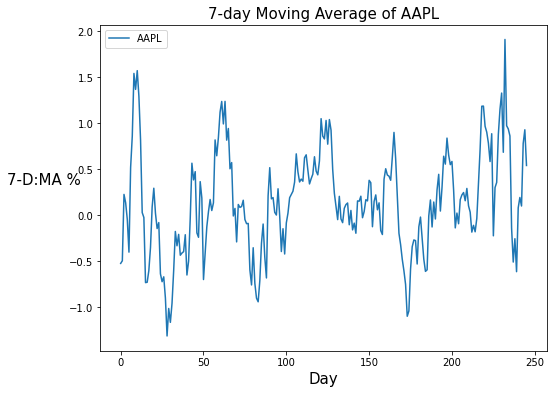

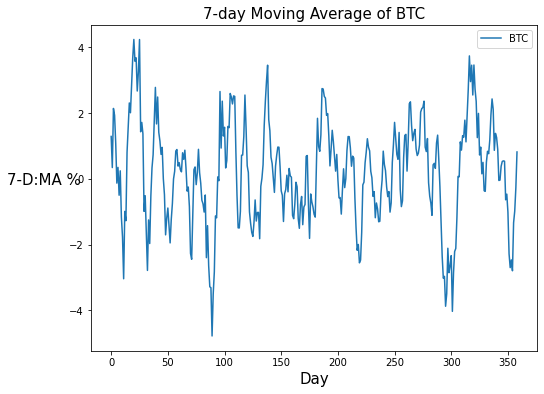

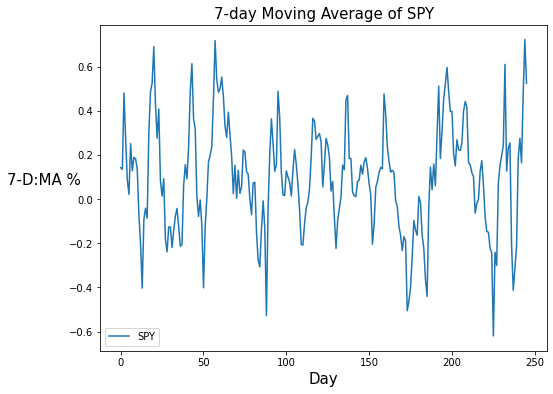

In [87]:
import matplotlib.pyplot as plt

tickers = ['AAPL', 'BTC', 'SPY']

# Plot 7-day moving average for each ticker
for ticker in tickers:
  fig, ax = plt.subplots(figsize=(8,6))
  ma7 = Open_daily_return_7day_MA[Open_daily_return_7day_MA['ticker'] == ticker]['value'].dropna()
  x = range(len(ma7))
  ax.plot(x, 100*ma7)
  ax.set_xlabel('Day', fontsize=15)
  ax.set_ylabel(f'7-D:MA %', fontsize=15, rotation=0, labelpad=25)
  ax.set_title(f'7-day Moving Average of {ticker}', fontsize=15)
  ax.legend([ticker])   
  
plt.show()

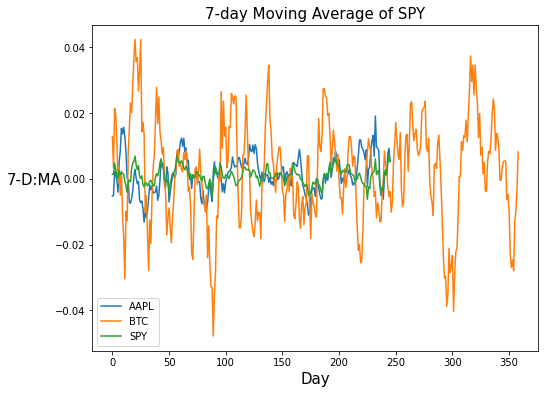

In [88]:
tickers = ['AAPL', 'BTC', 'SPY']
legend = []
fig, ax = plt.subplots(figsize=(8,6))

# Plot 7-day moving average for each ticker in an aggregate view
for ticker in tickers:
  ma7 = Open_daily_return_7day_MA[Open_daily_return_7day_MA['ticker'] == ticker]['value'].dropna()
  x = range(len(ma7))
  ax.plot(x, ma7)
  ax.set_xlabel('Day', fontsize=15)
  ax.set_ylabel(f'7-D:MA', fontsize=15, rotation=0, labelpad=20)
  ax.set_title(f'7-day Moving Average of {ticker}', fontsize=15)
  legend.append(ticker)

ax.legend(legend)
plt.show()

**Observation**

As it appears `BTC` is the most volatile asset among the three tickets that we have analyzed because even it avarage (7-day MA) is so volatile. Also, it seems that `AAPL` is sort of seasonal and it peaks happen every season.

## Problem 7
---
Like step 5 and perform an inner join (instead of outer join). 

Please notice the df shape difference between this inner join output. (again, please rename the columns properly) (10pt)

**Output**: 

The difference in the number of rows between 5 and 7

A short sentence describing your investigation on the root cause why the 3 dfs’ dates are not aligned. 


In [89]:
# Perform merge in 2 steps due to limitation of the merge function
df_merge2 = pd.merge(df_a, df_s, how='inner', on='Date', suffixes=['_a','_s'])
df_merge2 = pd.merge(df_merge2, df_bc, how='inner', on='Date', suffixes=['_x','_bc'])
df_merge2

,Date,Open_a,High_a,Low_a,Close_a,Adj_Close_a,Volume_a,Prev_Open_a,Prev_Adj_Close_a,Open_daily_return_a,...,Open,High,Low,Close,Adj_Close,Volume,Prev_Open,Prev_Adj_Close,Open_daily_return,Adj_Close_daily_return
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,133.520004,128.453445,0.000000,...,32810.94922,33440.21875,28722.75586,31971.91406,31971.91406,8.116348e+10,32129.40820,32782.02344,0.021212,-0.024712
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,133.520004,128.453445,-0.034676,...,31977.04102,34437.58984,30221.18750,33992.42969,33992.42969,6.754732e+10,32810.94922,31971.91406,-0.025416,0.063197
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664207,155088000,128.889999,130.041611,-0.009077,...,34013.61328,36879.69922,33514.03516,36824.36328,36824.36328,7.528943e+10,31977.04102,33992.42969,0.063689,0.083311
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952271,109578200,127.720001,125.664207,0.005011,...,36833.87500,40180.36719,36491.19141,39371.04297,39371.04297,8.476214e+10,34013.61328,36824.36328,0.082916,0.069157
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073929,105158200,128.360001,129.952271,0.031708,...,39381.76563,41946.73828,36838.63672,40797.60938,40797.60938,8.810752e+10,36833.87500,39371.04297,0.069172,0.036234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,175.850006,176.055695,0.007051,...,50802.60938,51956.32813,50499.46875,50640.41797,50640.41797,2.432435e+10,50428.69141,50809.51563,0.007415,-0.003328
248,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,177.089996,180.100540,0.017336,...,50679.85938,50679.85938,47414.21094,47588.85547,47588.85547,3.343038e+10,50802.60938,50640.41797,-0.002416,-0.060259
249,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900,180.160004,179.061859,-0.004607,...,47623.87109,48119.74219,46201.49609,46444.71094,46444.71094,3.004923e+10,50679.85938,47588.85547,-0.060300,-0.024042
250,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000,179.330002,179.151749,0.000781,...,46490.60547,47879.96484,46060.31250,47178.12500,47178.12500,2.668649e+10,47623.87109,46444.71094,-0.023796,0.015791


In [90]:
# Ensure BTC columns are properly named
df_merge2.rename(columns={'Open':'Open_bc','High':'High_bc','Low':'Low_bc','Close':'Close_bc','Adj Close':'Adj Close_bc','Volume':'Volume_bc','Prev_Open':'Prev_Open_bc','Prev_Adj Close':'Prev_Adj_Close_bc','Open_daily_return':'Open_daily_return_bc','Adj_Close_daily_return':'Adj_Close_daily_return_bc','ticker':'ticker_bc'}, inplace=True)

In [91]:
# Compare inner vs. outer joins - expecting larger number for outer join 
print ('Inner join rows: ', df_merge2.index.size)
print ('Outer join rows: ', df_merge.index.size)

Inner join rows:  252
Outer join rows:  365


**Observations**:


*   `AAPL` and `SPY` data provided only 252 rows each
*   `BTC` provided 364 rows

Hence, inner joining on Date can only provide 252 rows max, assuming `AAPL` and
`BTC` reported data on the same days.

Outer joining should provide 364 rows, since out join would pull all data from all datasets involved.

Note that the inner join results in a rename of all columns, which makes the data more difficult to work with.



## Problem 8
---
A typical ML practice is to standardize/normalize across all features (sometimes targets as well) (10pt)

Two common scaling practices are 
* Min Max Scalar
* Standard Scalar

Write your own scalar UDFs, and apply them to the 3 renamed `Open_daily_return` columns from 7.; output the scaled features to new columns


In [92]:
# Define min/max scaling as a lambda
udf_min_max = lambda x: x-x.min()/x.max()-x.min()

In [93]:
# Define min/max scaling function
def min_max_scalar(x): 
   return (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [94]:
# Extract the Open_daily_return columns into a new df
opendaily = df_merge2[['Open_daily_return_a', 'Open_daily_return_bc', 'Open_daily_return_s']]
# Rename columns for convenience
opendaily.columns = ['AAPL', 'BTC', 'SPY']
# Apply the min/max scaler to the Open_daily_returns
opendaily_minmax = opendaily.apply(udf_min_max) 
opendaily_minmax

,AAPL,BTC,SPY
0,1.099579,0.933554,1.136020
1,1.064902,0.886926,1.116809
2,1.090501,0.976030,1.140394
3,1.104590,0.995257,1.153304
4,1.131286,0.981514,1.147958
...,...,...,...
247,1.106630,0.919756,1.143081
248,1.116915,0.909925,1.148010
249,1.094972,0.852041,1.134471
250,1.100359,0.888545,1.138012


In [95]:
# Define standard scaler as a lambda
udf_standard = lambda x: x-x.mean()/x.std()

In [96]:
# Apply the standard scaler to the Open_daily_returns
opendaily_standard = opendaily.apply(udf_standard) 
opendaily_standard

,AAPL,BTC,SPY
0,-0.079857,-0.013335,-0.124303
1,-0.114533,-0.059963,-0.143514
2,-0.088934,0.029141,-0.119929
3,-0.074846,0.048368,-0.107019
4,-0.048149,0.034625,-0.112365
...,...,...,...
247,-0.072805,-0.027133,-0.117242
248,-0.062521,-0.036964,-0.112313
249,-0.084464,-0.094848,-0.125852
250,-0.079076,-0.058344,-0.122311


## Problem 9
---
Another ML practice to slice data row-wise into training and testing data. For now, we are going to ignore the fact that the data is time-series, and just randomly shuffle the data and split them into training and test sets. (20pt)

**Part I:**

Write a function that inputs a dataframe, a parameter that determines the size of the training (vs. testing) set, and a seed parameter in case users need to repeat the randomness.

Hint, there are a couple approaches, and feel free to choose either
Shuffle the df, and split the df into ‘training’ and ‘testing’ set 
Use pd.DataFrame.sample()

Output: apply your function to the df of 7, use training = 80%, and set seed =1. return both training and testing data.


In [97]:
# Permutation-based solution
import numpy as np
# fix the seed so that we can repeat our experiment
np.random.seed(1)

# specifiy the percentage of training
pct_train = 80
# find the number of rows in our data frame
n = len(df_merge2)
# create a shuffled array of numbers equal to the number of rows
shuffled_indices = np.random.permutation(n)
print(shuffled_indices)
# get the number of rows that should be in the training set
n_train_sample = int(pct_train*n/100)

# convert arrays to list
index_train_list = shuffled_indices[:n_train_sample].tolist()
index_test_list = shuffled_indices[n_train_sample:].tolist()
print(len(index_train_list))
print(len(index_test_list))

# use train and test list index to get the training and test dataframes

df_train = df_merge2.iloc[index_train_list]
df_test = df_merge2.iloc[index_test_list]

df_train

[ 67 251 231 161  91 225  58 250 180   4 244 188 116 182 127  78 184  51
  27  73 226  34  95 186 120 119 248 241  38 216 227  44  62 208 160 230
  39  31  18 238 205  19  93 102  33 110  35  11  29   0 229  85 112 148
 171 117 118  28  16 130 181 150 172 189  47 197  40 168 138  69  89 233
 176 187 179  59  88 242 199 207  90  14 159  21  56 223  55 107  84  53
 132 177  99 122  42  17   5 185 106  48 201  66  70 220 114 245  54 246
  98 218 123 108 147  97  82 173 105 210  94 154  12 170 249 158 228 194
 240 167  81 124 164 163  13 221 169  45 145 103  36 202 234 193 232  75
 152 217 243   2 190   6 211 195  77 113  65 151  46  74  92 183  87 143
 174  10 162  32 136 166  83 196 165 155 100 125  23 126   9 214 104 153
 191 135 111 236  64  15  41 206 109  80  52  26  76  43  24   3 213  49
 149 198 131 239  30 200 121 175 115 219   8 209  60 128   1  57  22  61
  63   7 247 141  86  96 222 224 215  68  50 142 157 156 139 212 146 101
  20 178  25 134 237  71 204 129 144 192  79 133 20

,Date,Open_a,High_a,Low_a,Close_a,Adj_Close_a,Volume_a,Prev_Open_a,Prev_Adj_Close_a,Open_daily_return_a,...,Open_bc,High_bc,Low_bc,Close_bc,Adj_Close,Volume_bc,Prev_Open_bc,Prev_Adj_Close,Open_daily_return_bc,Adj_Close_daily_return_bc
67,2021-04-12,132.520004,132.850006,130.630005,131.240005,130.464600,91420000,129.800003,132.214188,0.020955,...,60175.94531,61253.03516,59589.87500,59893.45313,59893.45313,5.182869e+10,59846.23047,60204.96484,0.005509,-0.005174
251,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300,179.470001,177.973251,-0.007689,...,47169.37109,48472.52734,45819.95313,46306.44531,46306.44531,3.697417e+10,46490.60547,47178.12500,0.014600,-0.018476
231,2021-12-02,158.740005,164.199997,157.800003,163.759995,163.551620,136739200,167.479996,164.560349,-0.052185,...,57217.37109,57349.23438,55895.13281,56477.81641,56477.81641,3.237997e+10,56907.96484,57229.82813,0.005437,-0.013140
161,2021-08-24,149.449997,150.860001,149.149994,149.619995,149.211838,48606400,148.309998,149.301620,0.007687,...,49562.34766,49878.76953,47687.11719,47706.11719,47706.11719,3.536117e+10,49291.67578,49546.14844,0.005491,-0.037138
91,2021-05-14,126.250000,127.889999,125.849998,127.449997,126.912178,81918000,124.580002,124.442642,0.013405,...,49682.98047,51438.11719,48868.57813,49880.53516,49880.53516,5.573750e+10,49735.43359,49716.19141,-0.001055,0.003306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-11-05,151.889999,152.199997,150.059998,151.279999,151.087509,65414600,151.580002,150.548187,0.002045,...,61460.07813,62541.46875,60844.60938,61125.67578,61125.67578,3.060510e+10,62941.80469,61452.23047,-0.023541,-0.005314
49,2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828087,115227900,121.410004,123.257423,0.035335,...,55840.78516,56833.17969,53555.02734,56804.90234,56804.90234,5.974980e+10,59267.42969,55907.19922,-0.057817,0.016057
149,2021-08-06,146.350006,147.110001,145.630005,146.139999,145.741333,54067400,146.979996,146.439423,-0.004286,...,40865.86719,43271.66016,39932.17969,42816.50000,42816.50000,3.822648e+10,39744.51563,40869.55469,0.028214,0.047638
198,2021-10-15,143.770004,144.899994,143.509995,144.839996,144.444885,67885200,142.110001,143.367828,0.011681,...,57345.90234,62757.12891,56868.14453,61593.94922,61593.94922,5.178008e+10,57372.83203,57321.52344,-0.000469,0.074534


In [98]:
# Using pd.DataFrame.sample() for train/test split
def sample_train_test(df, pct_train, seed):
  # sample rows dateframe for training
  df_train = df.sample(frac=pct_train/100, random_state = seed)
  # get indicies that are left for creating a list of indices for test dataframe 
  test_index = list(set(df.index.tolist()) - set(df_train.index.tolist()))
  # get the test dataframe
  df_test = df.iloc[test_index]
  
  return df_train, df_test

In [99]:
# Execute the train/test split
train_set, test_set = sample_train_test (df_merge2, pct_train = 80, seed = 1)

print(train_set.shape)
print(test_set.shape)

(202, 31)
(50, 31)


**Part II**

Sometimes, one needs to do Stratified splitting. That is, randomly splitting data into train and test within each stratum. Change the function that you just wrote, and make sure it can handle the group by splitting. 

Output: Use df from step 3, let the strata be ticker labels, use training = 80%, and set seed =1. return both training and testing data.


In [100]:
# Use original datasets as input
for data in DATA_MAP:
  print(data[DF].shape)

(252, 11)
(365, 11)
(252, 11)


In [101]:
train_list = []
test_list = []

for data in DATA_MAP:
    # Call the split on this single df
    train_set, test_set = sample_train_test (data[DF], 80, 1)
    # Append to output results
    train_list.append(train_set)
    test_list.append(test_set)

# Assemble all results
train_result = pd.concat([df for df in train_list], join='outer')
test_result = pd.concat([df for df in test_list], join='outer')

# Print final train/test results
print('train:', train_result.shape)
print('test:', test_result.shape)

train: (696, 11)
test: (173, 11)
